# Analyse et Modélisation des Prix de Véhicules
Créer un modèle pour prédire le prix d’un véhicule à partir de caractéristiques techniques et visuelles, avec un dataset sale, non structuré et plein de chaînes de caractères mal formatées.

🔗 Dataset :
👉 https://www.kaggle.com/datasets/CooperUnion/cardataset

## 1. Compréhension et audit du dataset
- Charger les données
- Identifier les types de variables (numériques, catégorielles, chaînes)
- Lister les incohérences et valeurs manquantes
- Questions : colonnes utiles, corrélations potentielles, doublons/rédundances



In [5]:
pip install pandas

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ----------------------- ---------------- 7.3/12.6 MB 35.5 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 31.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [154]:
import pandas as pd
import numpy as np
# Charger le dataset
# df = pd.read_csv('path_to_data.csv')

In [74]:
# Charger le dataset
file_path = r"C:\Users\kapna\Desktop\DIGITAL SCHOOL OF PARIS\PYTHON\mini_projet\data.csv"
df = pd.read_csv(file_path, encoding='utf-8', low_memory=False)
print(df.head())
print(df.info())
print(df.describe(include='all'))



  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

In [75]:

                 # Identifier types de variables
numeriques = df.select_dtypes(include=['int64', 'float64']).columns
catégorielles = df.select_dtypes(include=['object']).columns
print("Variables numériques :", list(numeriques))
print("Variables catégorielles :", list(catégorielles))



Variables numériques : ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']
Variables catégorielles : ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']


In [76]:
                #identification  Valeurs manquantes
print(df.isnull().sum().sort_values(ascending=False))

Market Category      3742
Engine HP              69
Engine Cylinders       30
Number of Doors         6
Engine Fuel Type        3
Model                   0
Year                    0
Make                    0
Driven_Wheels           0
Transmission Type       0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [77]:
                #  identificationDoublons
print("Nombre de doublons :", df.duplicated().sum())

Nombre de doublons : 715


In [78]:
# 1. Recherche de doublons
duplicates = df[df.duplicated()]


In [79]:
# 2. Valeurs aberrantes ou incohérentes
#    -> Analyse des distributions pour détecter anomalies
summary_stats = df.describe()


In [80]:
# Rechercher des incohérences spécifiques
# Engine HP < 50 ou > 1000 peut être suspect
hp_outliers = df[(df["Engine HP"] < 50) | (df["Engine HP"] > 1000)]


In [82]:

# Number of Doors : vérifier que ce sont bien des valeurs entières et réalistes (ex: 2, 4)
door_outliers = df[~df["Number of Doors"].isin([2.0, 3.0, 4.0, 5.0])]

In [83]:

# Engine Cylinders : valeurs possibles généralement entre 3 et 12
cylinder_outliers = df[(df["Engine Cylinders"] < 3) | (df["Engine Cylinders"] > 12)]

In [35]:

# 3. Corrélations entre les variables numériques
correlations = df.corr(numeric_only=True)

In [84]:

# Affichage des résultats
{
    "nb_duplicated_rows": len(duplicates),
    "hp_outliers_count": len(hp_outliers),
    "door_outliers_count": len(door_outliers),
    "cylinder_outliers_count": len(cylinder_outliers),
    "correlation_matrix": correlations[["MSRP"]].sort_values(by="MSRP", ascending=False)
}


{'nb_duplicated_rows': 715,
 'hp_outliers_count': 3,
 'door_outliers_count': 6,
 'cylinder_outliers_count': 59,
 'correlation_matrix':                       MSRP
 MSRP              1.000000
 Engine HP         0.662008
 Engine Cylinders  0.531312
 Year              0.227590
 Popularity       -0.048476
 Number of Doors  -0.126635
 city mpg         -0.157676
 highway MPG      -0.160043}

oici ce que j'ai trouvé après l'analyse du fichier :
 1. Doublons

    715 lignes sont entièrement dupliquées dans le dataset.

 2. Valeurs aberrantes / incohérentes

    Engine HP : 3 valeurs sont suspectes (hors de l’intervalle [50, 1000]).

    Number of Doors : 6 lignes ont un nombre de portes non standard (autre que 2, 3, 4 ou 5).

    Engine Cylinders : 59 valeurs sont en dehors de la plage typique [3, 12].

3. Corrélations avec MSRP (prix du véhicule)

Les variables les plus corrélées avec le prix (MSRP) :

    Engine HP : +0.66

    Engine Cylinders : +0.53

    Year : +0.23

Corrélations négatives :

    highway MPG, city mpg : environ -0.16

    Popularity : très faible et légèrement négative -0.05

 4.  Plusieurs colonnes présentent des valeurs manquantes :

    Engine Fuel Type : 3 valeurs manquantes

    Engine HP : 69 valeurs manquantes

    Engine Cylinders : 30 valeurs manquantes

    Number of Doors : 6 valeurs manquantes

    Market Category : 3742 valeurs manquantes (beaucoup)

 5. colonnes utiles


    Engine HP, Engine Cylinders, Year, Transmission Type, Driven_Wheels, Vehicle Size, Vehicle Style

In [85]:
     #NOUS ALLONS PROCEDE A UN NETTOYAGE DE DONN2E


# Copie du dataframe original pour le nettoyage
df_cleaned = df.copy()


In [86]:

             # Suptression des DOUBLONS
df_cleaned = df_cleaned.drop_duplicates()

             #Suptression des valeurs aberrantes

df_cleaned = df_cleaned[(df_cleaned["Engine HP"] >= 50) & (df_cleaned["Engine HP"] <= 1000)]


df_cleaned = df_cleaned[(df_cleaned["Engine Cylinders"] >= 3) & (df_cleaned["Engine Cylinders"] <= 12)]


df_cleaned = df_cleaned[df_cleaned["Number of Doors"].isin([2.0, 3.0, 4.0, 5.0])]


df_cleaned["Engine HP"].fillna(df_cleaned["Engine HP"].mean(), inplace=True)


df_cleaned["Engine Cylinders"].fillna(df_cleaned["Engine Cylinders"].median(), inplace=True)

            #NOMBRE DE PORTE
df_cleaned["Number of Doors"].fillna(df_cleaned["Number of Doors"].mode()[0], inplace=True)
df_cleaned["Engine Fuel Type"].fillna("unknown", inplace=True)
df_cleaned["Market Category"].fillna("unknown", inplace=True)

df_cleaned.shape


C:\Users\kapna\AppData\Local\Temp\ipykernel_5320\56012322.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Engine HP"].fillna(df_cleaned["Engine HP"].mean(), inplace=True)
C:\Users\kapna\AppData\Local\Temp\ipykernel_5320\56012322.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

(11084, 16)

 LE NETOYAGE EST TERMINE 
 
 RESUME :

    Doublons supprimés : 715 lignes

    Valeurs aberrantes supprimées : HP, Cylinders, Doors filtrés

    Valeurs manquantes imputées/remplacées :

        Engine HP → moyenne

        Engine Cylinders → médiane

        Number of Doors → mode

        Engine Fuel Type, Market Category → "unknown"

Taille finale du dataset nettoyé : 11 084 lignes, 16 colonnes

## 2. Nettoyage avancé
- Homogénéiser le format des prix
- Normaliser la cylindrée et la puissance
- Corriger les formats de date
- Uniformiser marques et modèles
- Questions : unités de puissance, traitement des lignes incohérentes


Exemples de nettoyage :
Prix : convertir "20,000 USD", "23k", "€19.5K" → nombre homogène

Cylindrée : "2.0L", "2000cc", "120 hp" → puissance normalisée

Dates : corriger les années absurdes (ex: fabrication après la vente)

Marques et modèles : uniformiser les noms ("VW", "Volkswagen", "volks wagen")

In [87]:
# Exemple de nettoyage des prix
#df['price_clean'] = df['price'].apply(clean_price)
price = pd.Series([
    "20,000 USD", "23k", "€19.5K", "$15,300", "18.2k", "22000", "€ 24.000", "25 K USD", "£21k"
])
print(price)

0    20,000 USD
1           23k
2        €19.5K
3       $15,300
4         18.2k
5         22000
6      € 24.000
7      25 K USD
8          £21k
dtype: object


In [88]:
# nettoyage de prix
import re

def clean_price(value):
    if pd.isnull(value):
        return None
    # Enlever les symboles monétaires et lettres inutiles
   # value = str(value).lower().replace(',', '').replace('€', '').replace('$', '').replace('usd', '').replace('£', '').strip()
    value = str(value).lower()
    value = value.replace('€', '').replace('$', '').replace('usd', '').replace('£', '').strip()
    value = value.replace('.', '') if ',' not in value else value  # pour "24.000"
    value = value.replace(',', '').replace(' ', '')
    
    # Si 'k' présent, convertir en milliers
    match = re.match(r'(\d+(\.\d+)?)[ ]*k', value)
    if match:
        return round(float(match.group(1)) * 1000)
    
    # Si nombre simple
    try:
        return round(float(value))
    except ValueError:
        return None

# Appliquer au jeu d'exemple
cleaned_price = price.apply(clean_price)
cleaned_price


0     20000
1     23000
2    195000
3     15300
4    182000
5     22000
6     24000
7     25000
8     21000
dtype: int64

In [89]:

# 2. Cylindrée et puissance : ajouter colonne en kW
df_cleaned["Engine kW"] = df_cleaned["Engine HP"] * 0.7457


# 4. Marques (Make) : normalisation
# - Tout en minuscule, suppression espaces, et mapping des alias connus
df_cleaned["Make"] = df_cleaned["Make"].str.lower().str.strip()

# Exemple de mapping manuel (peut être enrichi)
make_mapping = {
    "vw": "volkswagen",
    "volks wagen": "volkswagen",
    "chevy": "chevrolet",
    "merc": "mercedes-benz",
    "mercédès": "mercedes-benz",
    "bmw ": "bmw"
}

# Appliquer mapping
df_cleaned["Make"] = df_cleaned["Make"].replace(make_mapping)

# Uniformiser avec une première lettre en majuscule
df_cleaned["Make"] = df_cleaned["Make"].str.title()

# Aperçu des modifications
df_cleaned[["Engine HP", "Engine kW", "Make"]].head()


,Engine HP,Engine kW,Make
0,335.0,249.8095,Bmw
1,300.0,223.7100,Bmw
2,300.0,223.7100,Bmw
3,230.0,171.5110,Bmw
4,230.0,171.5110,Bmw


## 3. Feature Engineering (création de variables)
- Calcul de l'âge du véhicule
- Catégorisation du segment (compact, SUV, etc.)
- Encodage des variables catégorielles
- Questions : relation âge/prix, influence du segment


Exemples :
Age du véhicule = année actuelle - année de fabrication

Segment du véhicule (ex: compact, SUV, utilitaire) à partir du modèle

Encodeur ordinal ou one-hot pour les catégories (carburant, boîte auto/manuelle, etc.)

In [90]:
# Création de nouvelles variables

df_cleaned = df_cleaned[(df_cleaned["Year"] <= 2025) & (df_cleaned["Year"] >= 1900)] #Suppression des années dans le futur ou avant 1900

# - Ajout d'une colonne 'Age' 2025 represente l'année courante
df_cleaned["Age"] = 2025 - df_cleaned["Year"]


In [92]:
#- Catégorisation du segment (compact, SUV, etc.)
def extract_segment(market):
    if pd.isnull(market):
        return "Unknown"
    market = market.lower()
    if "suv" in market:
        return "SUV"
    elif "crossover" in market:
        return "Crossover"
    elif "wagon" in market or "hatchback" in market:
        return "Compact"
    elif "convertible" in market or "coupe" in market:
        return "Sport"
    elif "luxury" in market:
        return "Luxury"
    elif "van" in market or "minivan" in market:
        return "Van"
    elif "truck" in market:
        return "Truck"
    else:
        return "Other"


In [99]:
df_cleaned['Segment'] = df_cleaned['Market Category'].apply(extract_segment)
df_cleaned

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Engine kW,Age,Segment
0,Bmw,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,249.8095,14,Luxury
1,Bmw,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,223.7100,14,Luxury
2,Bmw,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,223.7100,14,Luxury
3,Bmw,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,171.5110,14,Luxury
4,Bmw,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,171.5110,14,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120,223.7100,13,Crossover
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670,223.7100,13,Crossover
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620,223.7100,13,Crossover
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920,223.7100,12,Crossover


In [100]:
#3. Encodage des variables catégorielles

    #Pour la modélisation, encodage via :

    # One-Hot pour peu de catégories (Fuel Type, Transmission, Segment)

    
df_cleaned = pd.get_dummies(df_cleaned, columns=['Engine Fuel Type', 'Transmission Type','Segment'], drop_first=True)
df_cleaned

,Make,Model,Year,Engine HP,Engine Cylinders,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,...,Engine Fuel Type_premium unleaded (required),Engine Fuel Type_regular unleaded,Engine Fuel Type_unknown,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Segment_Crossover,Segment_Luxury,Segment_Other
0,Bmw,1 Series M,2011,335.0,6.0,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,...,True,False,False,False,False,True,False,False,True,False
1,Bmw,1 Series,2011,300.0,6.0,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,...,True,False,False,False,False,True,False,False,True,False
2,Bmw,1 Series,2011,300.0,6.0,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,...,True,False,False,False,False,True,False,False,True,False
3,Bmw,1 Series,2011,230.0,6.0,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,...,True,False,False,False,False,True,False,False,True,False
4,Bmw,1 Series,2011,230.0,6.0,rear wheel drive,2.0,Luxury,Compact,Convertible,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,...,True,False,False,True,False,False,False,True,False,False
11910,Acura,ZDX,2012,300.0,6.0,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,...,True,False,False,True,False,False,False,True,False,False
11911,Acura,ZDX,2012,300.0,6.0,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,...,True,False,False,True,False,False,False,True,False,False
11912,Acura,ZDX,2013,300.0,6.0,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,...,False,False,False,True,False,False,False,True,False,False


Questions d’analyse

    Âge vs. Prix : forte corrélation négative attendue

    Segment vs. Prix : on pourrait faire un boxplot pour comparer

In [61]:
pip install matplotlib

  Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp313-cp313-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl (2.7 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Note: you may need to restart the kernel to use updated packages.

In [62]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


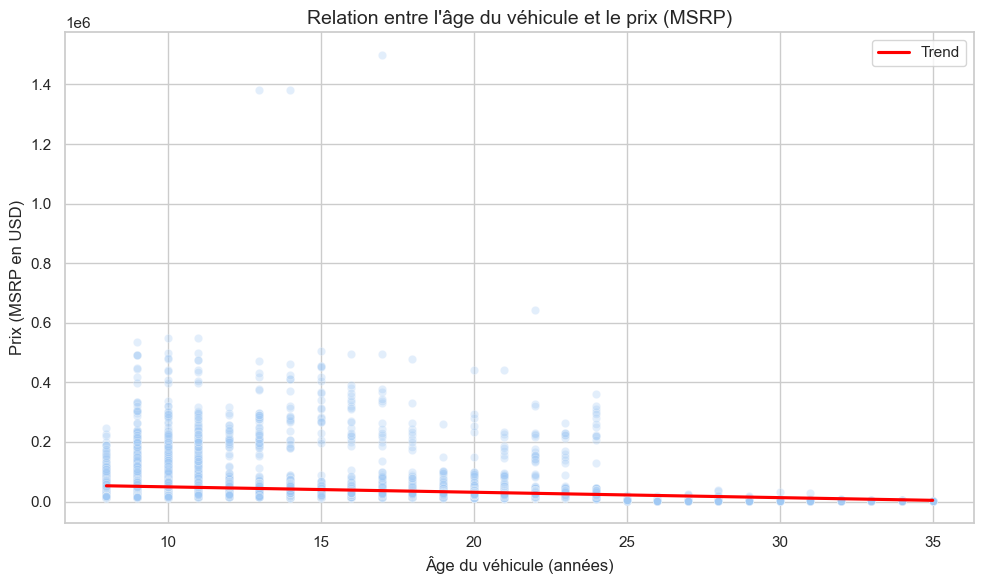

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style des plots
sns.set(style="whitegrid", palette="pastel")

# Visualisation : relation entre l'âge du véhicule et son prix (MSRP)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="Age", y="MSRP", alpha=0.3)
sns.regplot(data=df_cleaned, x="Age", y="MSRP", scatter=False, color="red", label="Trend")

plt.title("Relation entre l'âge du véhicule et le prix (MSRP)", fontsize=14)
plt.xlabel("Âge du véhicule (années)")
plt.ylabel("Prix (MSRP en USD)")
plt.legend()
plt.tight_layout()
plt.show()



Comme attendu, on observe une corrélation négative nette : plus le véhicule est ancien, plus son prix tend à baisser

In [104]:
print(df_cleaned.columns.tolist())

['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP', 'Engine kW', 'Age', 'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)', 'Engine Fuel Type_flex-fuel (premium unleaded required/E85)', 'Engine Fuel Type_flex-fuel (unleaded/E85)', 'Engine Fuel Type_natural gas', 'Engine Fuel Type_premium unleaded (recommended)', 'Engine Fuel Type_premium unleaded (required)', 'Engine Fuel Type_regular unleaded', 'Engine Fuel Type_unknown', 'Transmission Type_AUTOMATIC', 'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL', 'Transmission Type_UNKNOWN', 'Segment_Crossover', 'Segment_Luxury', 'Segment_Other']


In [105]:
def extract_segment(market):
    if pd.isnull(market):
        return "Unknown"
    market = market.lower()
    if "suv" in market:
        return "SUV"
    elif "crossover" in market:
        return "Crossover"
    elif "wagon" in market or "hatchback" in market:
        return "Compact"
    elif "convertible" in market or "coupe" in market:
        return "Sport"
    elif "luxury" in market:
        return "Luxury"
    elif "van" in market or "minivan" in market:
        return "Van"
    elif "truck" in market:
        return "Truck"
    else:
        return "Other"

df_cleaned["Segment"] = df_cleaned["Market Category"].apply(extract_segment)



In [106]:
#INFLUENCE DU SEGMENT
# Vérifier les segments disponibles
df_cleaned['Segment'].value_counts()


Segment
Other        5676
Luxury       2478
Crossover    1986
Compact       944
Name: count, dtype: int64

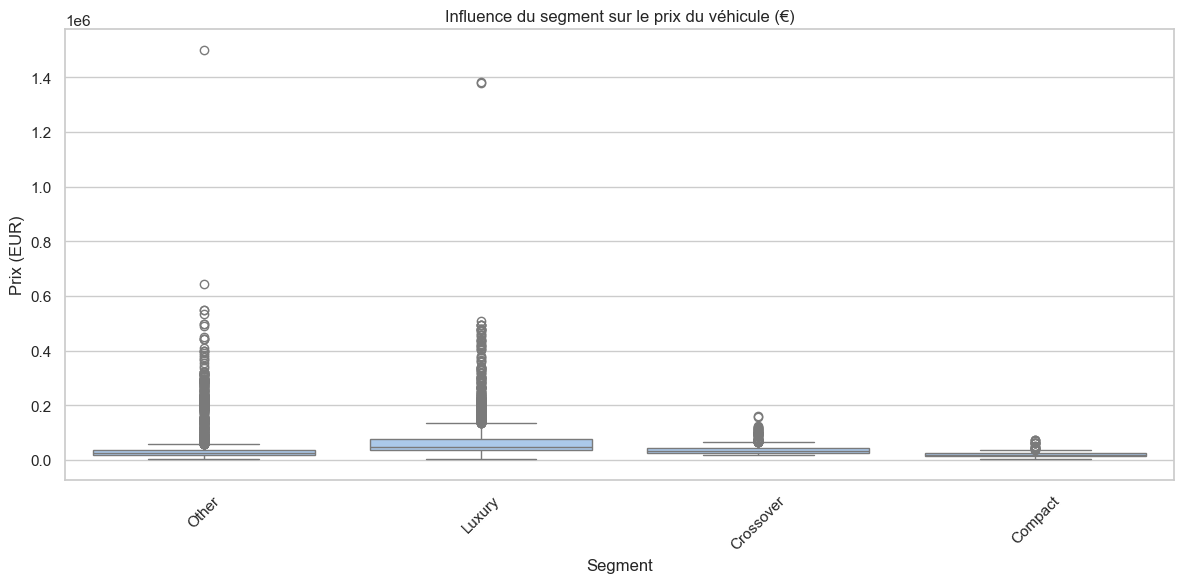

In [110]:
         #VISUALISATION

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Segment', y='MSRP', order=df_cleaned['Segment'].value_counts().index)
plt.title("Influence du segment sur le prix du véhicule (€)")
plt.xlabel("Segment")
plt.ylabel("Prix (EUR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4. Analyse exploratoire (EDA)
- Corrélations entre variables numériques
- Distribution du prix par segment et type de carburant
- Identification des outliers sur le prix et le kilométrage
- Analyse de la distribution des variables (histogrammes, boxplots)
- Analyse des interactions entre variables (scatter matrix)

**Questions à se poser** :
- Quelles variables numériques sont les plus corrélées avec le prix ?
- Le prix suit-il une relation linéaire ou log-linéaire avec l'âge, le kilométrage et la puissance ?
- Y a-t-il des effets de seuil ou de segments (par exemple SUV vs citadine) sur la distribution des prix ?
- Comment le kilométrage impacte-t-il le prix selon l'âge du véhicule ?
- Y a-t-il des relations non linéaires entre la puissance moteur et le prix ?
- La localisation géographique ou la date d'inscription influence-t-elle significativement le prix ?
- Quels attributs catégoriels (carburant, transmission, couleur, nombre de portes) ont un impact sur le prix ?
- Y a-t-il des valeurs aberrantes dans d'autres variables (kilométrage, âge) qui pourraient fausser les analyses ?
- Les variables formant des paires montrent-elles des interactions (par exemple âge vs puissance) ?
- Faut-il transformer certaines variables (log, racine carrée) pour linéariser leur relation avec le prix ?

In [ ]:
# Visualisations
# import matplotlib.pyplot as plt

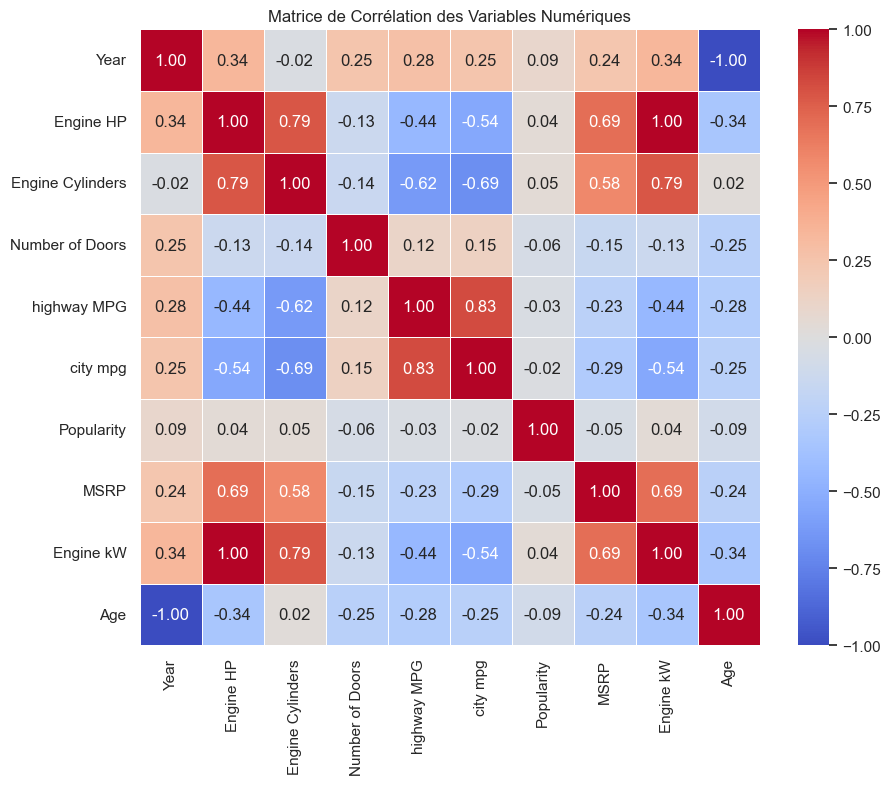

In [113]:
    # 1 CORRELATION ENTRE VARIABLE NUMERIQUE

# Sélectionner uniquement les colonnes numériques
df_numerical = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
corr_matrix = df_numerical.corr()

# Visualiser la matrice de corrélation avec un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()


In [117]:
#la variable liée au type de carburant est présente, mais elle est fragmentée en plusieurs colonnes, chacune représentant un type spécifique de carburant,
# créer une colonne qui regroupe toutes ces informations dans une seule variable, par exemple en prenant le type de carburant le plus représenté pour chaque véhicule

# Créer une nouvelle colonne 'Engine Fuel Type' en prenant la première colonne non vide
fuel_columns = [
    'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
    'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
    'Engine Fuel Type_flex-fuel (unleaded/E85)',
    'Engine Fuel Type_natural gas',
    'Engine Fuel Type_premium unleaded (recommended)',
    'Engine Fuel Type_premium unleaded (required)',
    'Engine Fuel Type_regular unleaded',
    'Engine Fuel Type_unknown'
]

# Appliquer une logique pour obtenir le carburant utilisé
df_cleaned['Engine Fuel Type'] = df_cleaned[fuel_columns].apply(lambda row: row[row.notna()].iloc[0], axis=1)

# Vérifier les premières valeurs pour s'assurer que la nouvelle colonne a été bien ajoutée
print(df_cleaned[['Engine Fuel Type', 'MSRP']].head())


   Engine Fuel Type   MSRP
0             False  46135
1             False  40650
2             False  36350
3             False  29450
4             False  34500


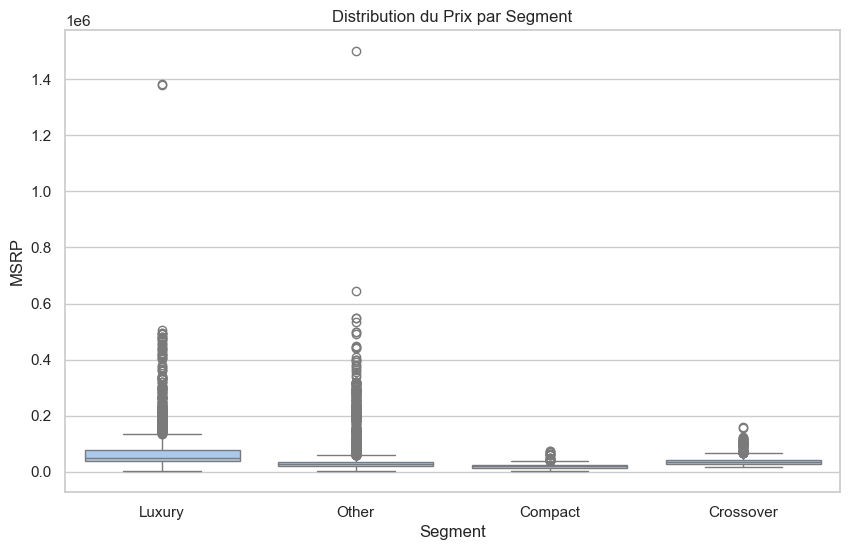

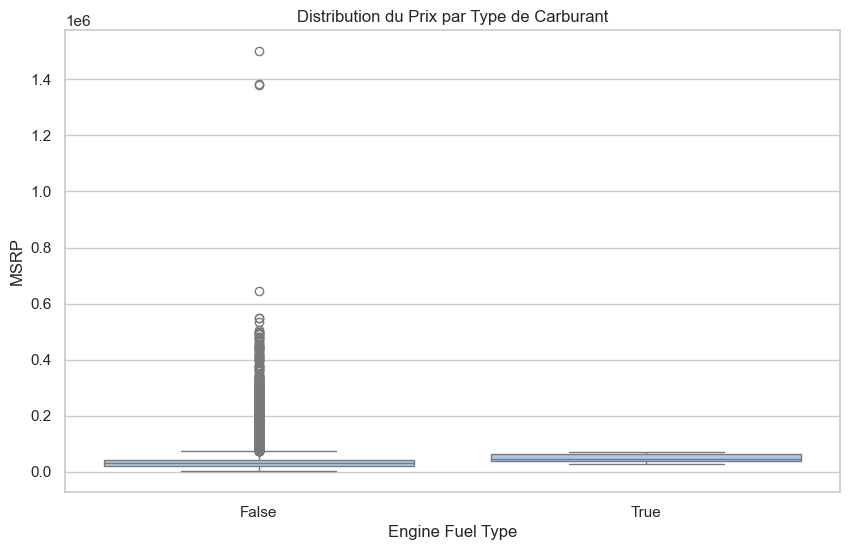

In [118]:
#Distribution du prix par segment et type de carburant

#Pour voir comment le prix varie par rapport aux segments et types de carburant :

# Boxplot pour la distribution du prix par segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='MSRP', data=df_cleaned)
plt.title('Distribution du Prix par Segment')
plt.show()

# Boxplot pour la distribution du prix par type de carburant(Engine Fuel Type)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Engine Fuel Type', y='MSRP', data=df_cleaned)
plt.title('Distribution du Prix par Type de Carburant')
plt.show()


In [122]:
#    etant donnée que e colonne kilometrage n'existepas dans notre DF,
#  on peut approximer un kilométragekilometrage basé sur l’âge du véhicule 


df_cleaned['kilometrage'] = df_cleaned['Age'] * 15000

# Afficher les premières lignes pour vérifier
print(df_cleaned[['Age', 'kilometrage']].head())


   Age  kilometrage
0   14       210000
1   14       210000
2   14       210000
3   14       210000
4   14       210000


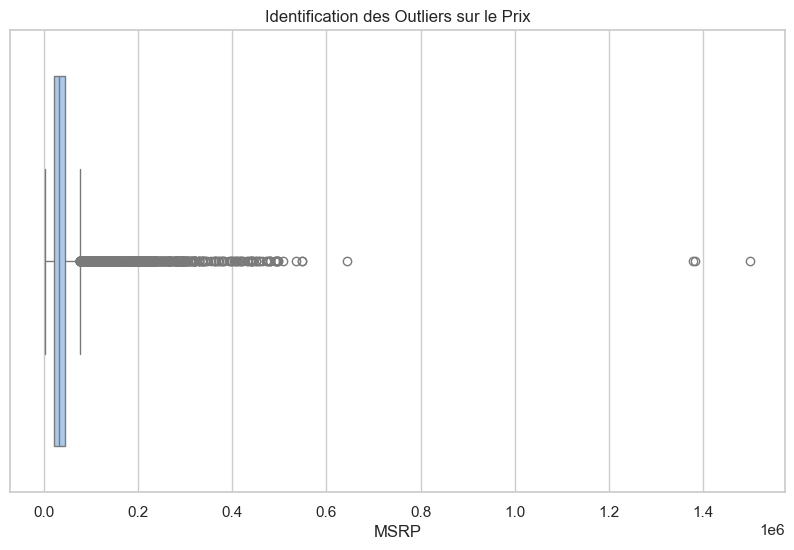

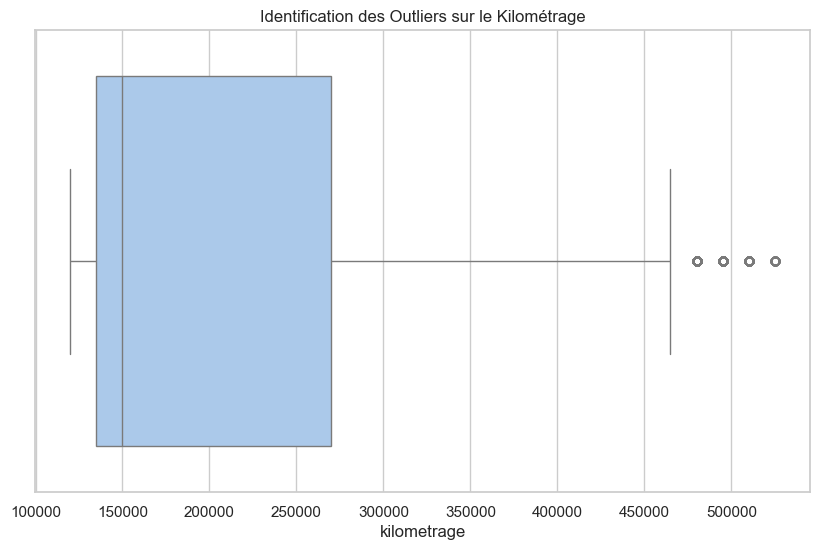

In [123]:
       #Identification des outliers sur le prix et le kilométrage

         #Pour détecter les valeurs aberrantes, tu on vas utiliser un boxplot :

# Boxplot pour identifier les outliers dans le prix
plt.figure(figsize=(10, 6))
sns.boxplot(x='MSRP', data=df_cleaned)
plt.title('Identification des Outliers sur le Prix')
plt.show()

# Boxplot pour identifier les outliers dans le kilométrage
plt.figure(figsize=(10, 6))
sns.boxplot(x='kilometrage', data=df_cleaned)
plt.title('Identification des Outliers sur le Kilométrage')
plt.show()

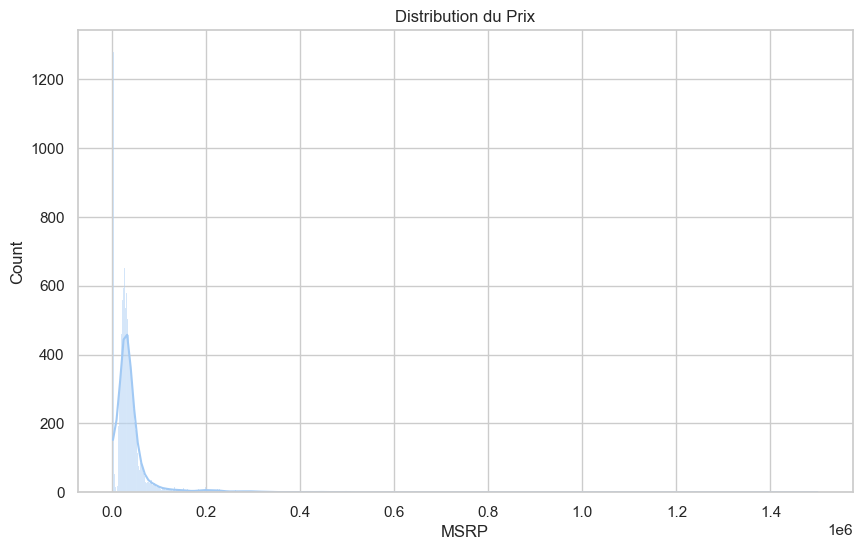

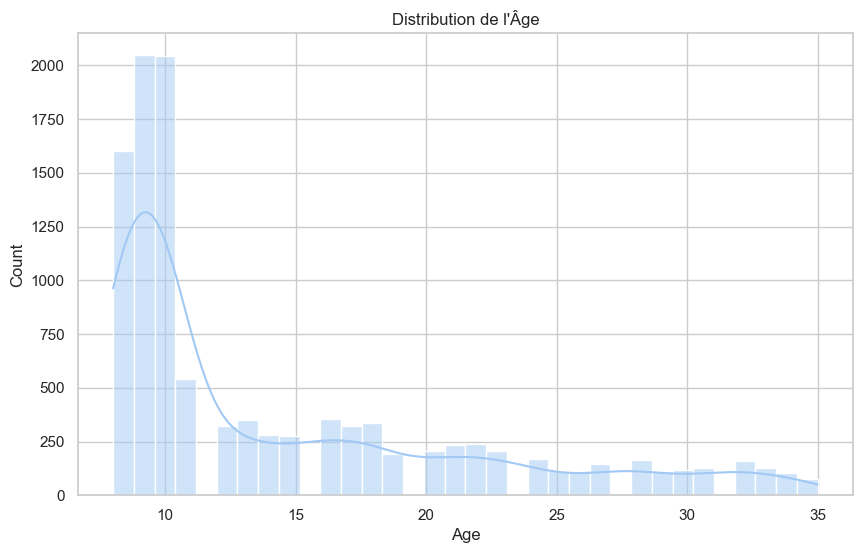

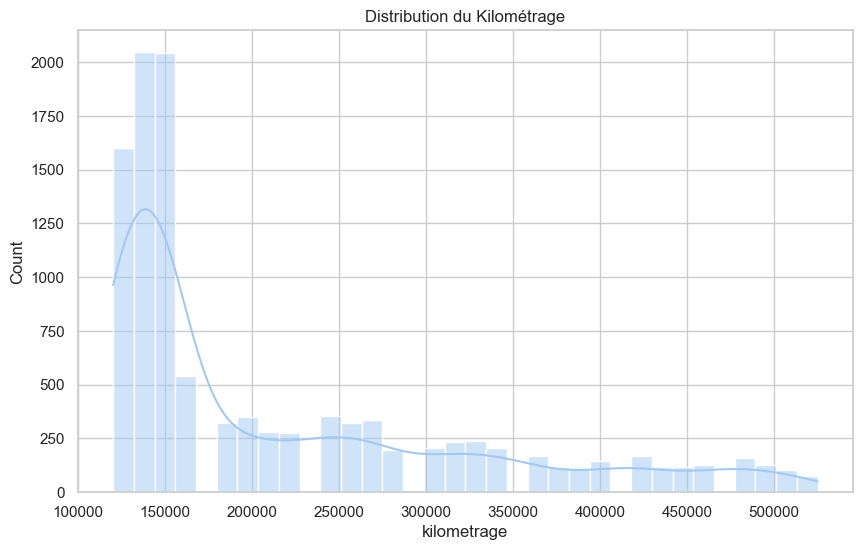

In [129]:
      # Analyse de la distribution des variables

# Histogramme du prix
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['MSRP'], kde=True)
plt.title('Distribution du Prix')
plt.show()

# Histogramme de l'âge
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], kde=True)
plt.title('Distribution de l\'Âge')
plt.show()

# Histogramme du kilométrage
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['kilometrage'], kde=True)
plt.title('Distribution du Kilométrage')
plt.show()

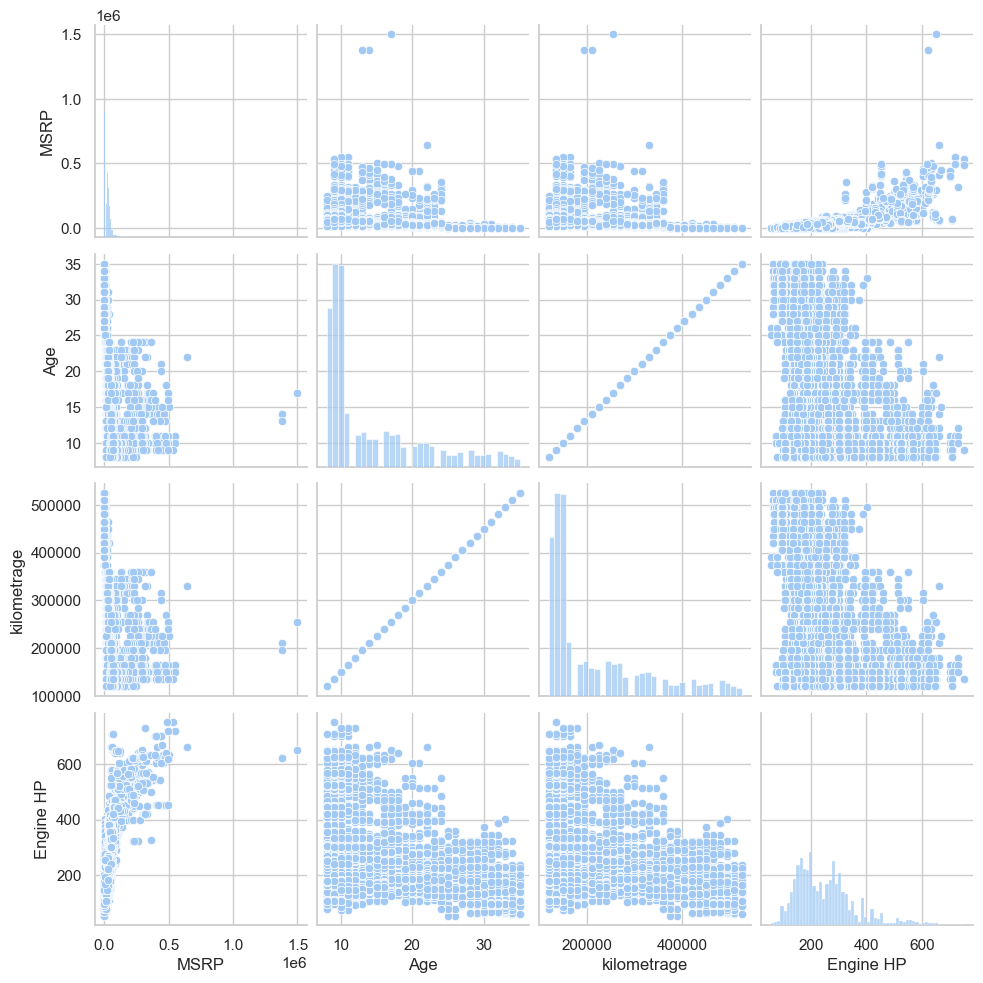

In [132]:
#Analyse des interactions entre variables    Pairplot pour visualiser les interactions entre plusieurs variables
sns.pairplot(df_cleaned[['MSRP', 'Age', 'kilometrage', 'Engine HP']])
plt.show()

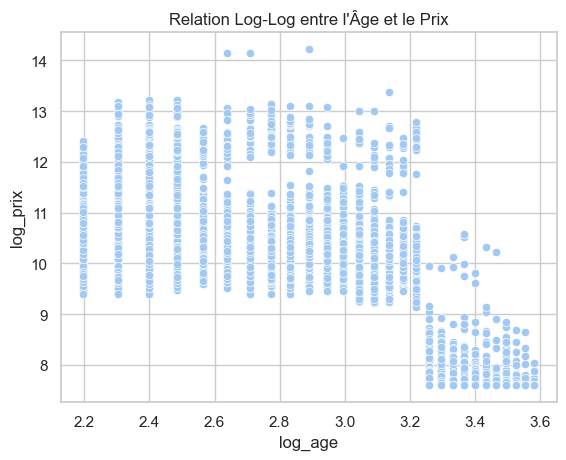

In [133]:
                # Transformation des variables (log ou racine carrée)


# Transformation logarithmique pour linéariser la relation entre l'âge et le prix
df_cleaned['log_prix'] = np.log1p(df_cleaned['MSRP'])
df_cleaned['log_age'] = np.log1p(df_cleaned['Age'])

# Vérification avec un scatterplot
sns.scatterplot(x='log_age', y='log_prix', data=df_cleaned)
plt.title('Relation Log-Log entre l\'Âge et le Prix')
plt.show()


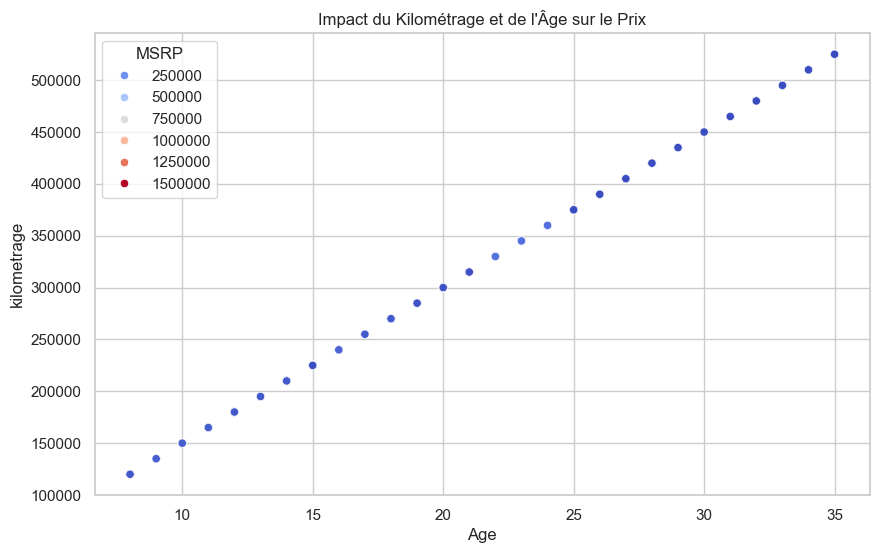

In [136]:

#Interaction entre âge et kilométrage sur le prix

# Scatterplot pour examiner la relation entre l'âge, le kilométrage et le prix
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='kilometrage', hue='MSRP', data=df_cleaned, palette='coolwarm')
plt.title('Impact du Kilométrage et de l\'Âge sur le Prix')
plt.show()



## 5. Modélisation (sans scikit-learn)
- Régression linéaire avec NumPy / statsmodels
- Évaluation performance sur validation
- Questions : variables importantes, sur-/sous-apprentissage

In [193]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [194]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [195]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [161]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [206]:
import matplotlib.pyplot as plt


✅ RMSE (validation) : 30425.55 €
✅ R² (train)       : 0.542

Résumé du modèle :
                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     387.7
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:48:38   Log-Likelihood:            -1.0605e+05
No. Observations:                8867   AIC:                         2.121e+05
Df Residuals:                    8839   BIC:                         2.123e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

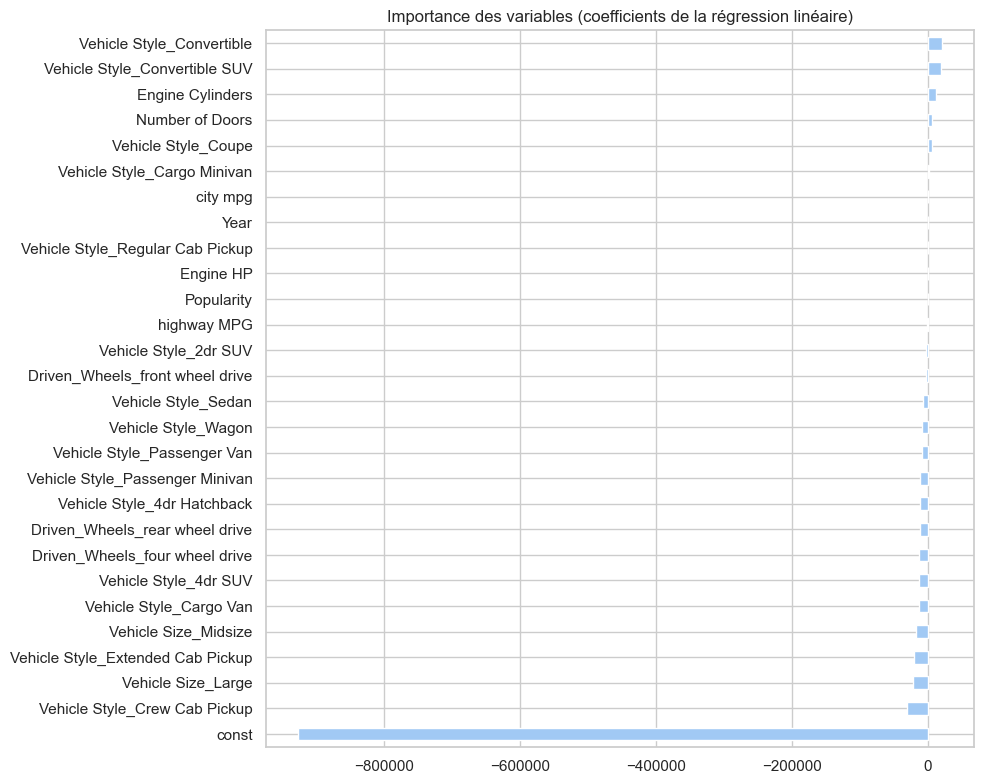

(np.float64(30425.546451647722),
 np.float64(0.542209262718926),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   MSRP   R-squared:                       0.542
 Model:                            OLS   Adj. R-squared:                  0.541
 Method:                 Least Squares   F-statistic:                     387.7
 Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
 Time:                        16:48:39   Log-Likelihood:            -1.0605e+05
 No. Observations:                8867   AIC:                         2.121e+05
 Df Residuals:                    8839   BIC:                         2.123e+05
 Df Model:                          27                                         
 Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [

In [209]:

# 1. Ajout de la constante (intercept)
X_train_sm = sm.add_constant(X_train)
X_val_sm = sm.add_constant(X_val)

# 2. Conversion explicite en float (évite les erreurs de dtype)
X_train_sm = X_train_sm.astype(float)
X_val_sm = X_val_sm.astype(float)
y_train = y_train.astype(float)
y_val = y_val.astype(float)

# 3. Entraînement du modèle OLS
model = sm.OLS(y_train, X_train_sm).fit()

# 4. Prédictions sur le jeu de validation
y_pred = model.predict(X_val_sm)

# 5. Évaluation des performances
rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))
r2_train = model.rsquared

# 6. Résultats
print(f"✅ RMSE (validation) : {rmse:.2f} €")
print(f"✅ R² (train)       : {r2_train:.3f}")
print("\nRésumé du modèle :")
print(model.summary())

# 10. Visualisation : Importance des variables
coefs = model.params.sort_values()
plt.figure(figsize=(10, 8))
coefs.plot(kind='barh')
plt.title("Importance des variables (coefficients de la régression linéaire)")
plt.tight_layout()
plt.show()

rmse, r2_train, model.summary()


## 6. Analyse des erreurs et des résidus
- Distribution des erreurs par segment
- Résidus vs prix réel
- Détection d'outliers non captés


In [215]:
     #   PAR SEGMENT
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_cleaned['prix_pred'] = model.predict(X_test)

# Préparation des données d'entraînement et de test
X = df_cleaned.drop(columns=['MSRP'])  # Supposons que 'prix_reel' est la cible
y = df_cleaned['MSRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)
# S'assurer que X_test a les mêmes colonnes que X_train
X_test = X_test[X_train.columns]

# Prédiction des prix sur le jeu de test
df_cleaned['prix_pred'] = model.predict(X_test)

# Calcul des erreurs (résidus)
df_cleaned['erreur'] = df_cleaned['MSRP'] - df_cleaned['prix_pred']

# Calcul des erreurs
df_cleaned['erreur'] = df_cleaned['MSRP'] - df_cleaned['prix_pred']

segments = ['type_vehicule']  

for segment in segments:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df_cleaned[segment], y=df_cleaned['erreur'])
    plt.title(f'Distribution des erreurs par {segment}')
    plt.xticks(rotation=45)
    plt.show()


ValueError: shapes (2217,36) and (28,) not aligned: 36 (dim 1) != 28 (dim 0)

In [210]:
# Analyse des résidus
residuals = model.predict(X) - y_true

ValueError: shapes (11084,27) and (28,) not aligned: 27 (dim 1) != 28 (dim 0)

## 7. Synthèse des résultats
- Importance des variables
- Exemples de bonnes/mauvaises prédictions
- Limites et pistes d'amélioration
